In [1]:
import math

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

import PeakTools

# %matplotlib notebook
%matplotlib inline

In [2]:
MAX_ORDER = 4
o_list = [[1], [2],[3],[4], [1,2], [2,4], [1,3]]
USE_THETA = True

# Function to Fit
\begin{align}
    \frac{\tilde{E}_{NC}(\omega_{0,k+1})}{\tilde{E}_{NC}(\omega_{0,k})} = \frac{\epsilon(\omega_{0,k+1})}{\epsilon(\omega_{0,k})}	&= \left( \frac{\omega_{0,k+1}}{\omega_{0,k}}\right)^2 \frac{S }{k+1 } \frac{\left| 1 + c\sqrt{S} \left( 1  - \frac{k+1}{S} \right)\right|^2  }{\left| 1 + c \sqrt{S} \left( 1  - \frac{k}{S} \right) \right|^2 } \\
    &= \left( \frac{\omega_{0,k+1}}{\omega_{0,k}}\right)^2 \frac{S }{k+1 } \frac{1 + 2 |c|\cos \theta \sqrt{S} \left( 1  - \frac{k+1}{S} \right) + |c|^2\left( 1  - \frac{k+1}{S} \right)^2 }{1 + 2 |c|\cos \theta \sqrt{S} \left( 1  - \frac{k}{S} \right) + |c|^2\left( 1  - \frac{k}{S} \right)^2 }\\
0 &= \frac{\epsilon(\omega_{0,k+1})}{\epsilon(\omega_{0,k})} \left( \frac{\omega_{0,k}}{\omega_{0,k+1}}\right)^2 - \frac{S }{k+1 } \frac{1 + 2 |c|\cos \theta \sqrt{S} \left( 1  - \frac{k+1}{S} \right) + |c|^2\left( 1  - \frac{k+1}{S} \right)^2 }{1 + 2 |c|\cos \theta \sqrt{S} \left( 1  - \frac{k}{S} \right) + |c|^2\left( 1  - \frac{k}{S} \right)^2 }
\end{align}

# Citeable Tetracene in Toluene

![See dat spectra...](tetracene_citeable_toluene.jpeg "Tetracene in Toluene")

In [3]:
#From DataThief
ZERO_PAD = 100

tetracene_toluene_spectra  = np.loadtxt("spectra_csv/tetracene_citeable_toluene.csv", delimiter=",")

tetracene_toluene_wavelength_nm = tetracene_toluene_spectra[:,0] 
tetracene_toluene_wavenumbers = 1 / (tetracene_toluene_wavelength_nm * 1e-7)
tetracene_toluene_abs = tetracene_toluene_spectra[:,1] 
# tetracene_toluene_abs = -np.log(tetracene_toluene_abs)
tetracene_toluene_abs = tetracene_toluene_abs - np.min(tetracene_toluene_abs)
tetracene_toluene_abs = tetracene_toluene_abs/tetracene_toluene_wavenumbers**2
tetracene_toluene_abs = tetracene_toluene_abs /np.max(tetracene_toluene_abs)

tetracene_toluene_wavenumbers, tetracene_toluene_abs = PeakTools.left_zero_pad_spectra(tetracene_toluene_wavenumbers, tetracene_toluene_abs, ZERO_PAD)

In [4]:
tetracene_toluene_peak_energy_guesses = [21053.0, 22505.0, 24057.0, 25368.0 , 26658.3, 28168.][0:-1]
tetracene_toluene_peak_height_guesses = [.95, .76, .35, .14, .05, .014][0:-1]
width_guess_wavenumbers = 100.0

In [5]:
tetracene_toluene_fit = PeakTools.SpectraFit(spectral_energies=tetracene_toluene_wavenumbers, 
                           spectral_amplitudes=tetracene_toluene_abs, 
                           approx_peak_energies = tetracene_toluene_peak_energy_guesses, 
                           approx_peak_heights = tetracene_toluene_peak_height_guesses, 
                           width_guess = width_guess_wavenumbers)

PREPARING ANALYSIS FOR SPECTRA:


---------GAUSSIAN---------

gaussian profile fit to spectra with cost 3.47282516499
('anharmonic fit', array([   -25.30163669,   1491.40759951,  20363.92763647]))
('chi', 0.016964937485633585)
max bound n=28
r^2=0.999908581893

---------LORENTZIAN---------

lorentzian profile fit to spectra with cost 1.71378128041
('anharmonic fit', array([ -1.24275241e+01,   1.45385320e+03,   2.03792509e+04]))
('chi', 0.0085479909658361924)
max bound n=57
r^2=0.999956578603

---------VOIGT---------

voigt profile fit to spectra with cost 1.01412956894
('anharmonic fit', array([  1.16020923e+00,   1.38886548e+03,   2.04200642e+04]))
('chi', -0.00083536472544621136)
max bound n=-600
r^2=0.999951724483


BEST METHOD WAS: voigt


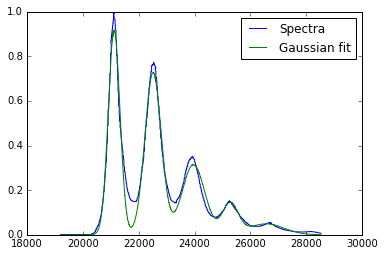

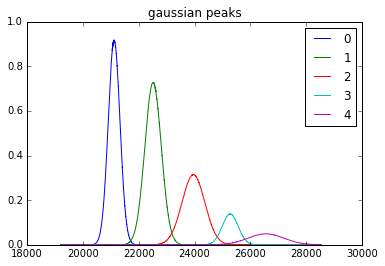

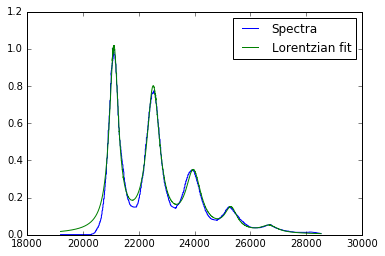

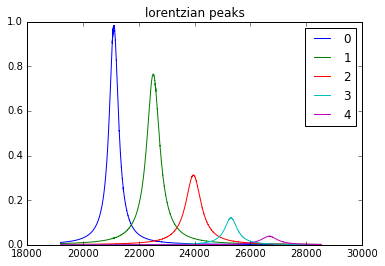

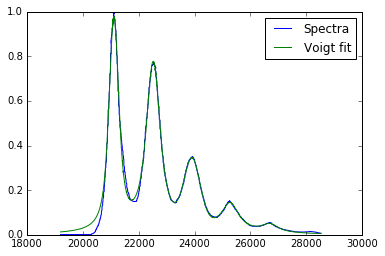

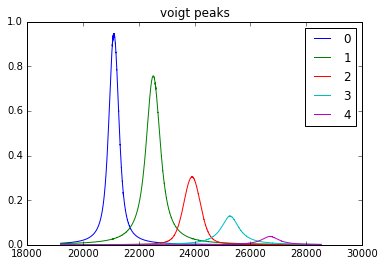

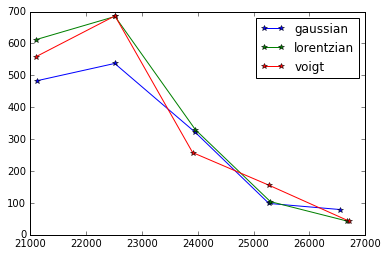

In [6]:
tetracene_toluene_fit.fit_and_observe_spectra()

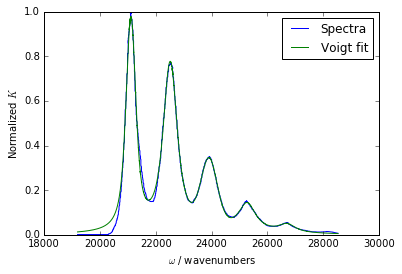

In [7]:
tetracene_toluene_fit.plot_spectral_fit(["voigt"])
# plt.title("Tetracene in Toluene")
plt.xlabel(r"$\omega$ / wavenumbers")
plt.ylabel(r"Normalized $K$")
plt.legend(loc=0)
plt.savefig("toluene_spectra_fit.png", dpi=900)

In [8]:
tetracene_toluene_fit.explore_non_condon_orders(max_order=None, order_lists_to_calculate = o_list, method_str="voigt", use_theta=USE_THETA)

[1] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 1 better models were found
HO/c model fit Found for voigt!  S=1.18515166464, c=[-0.], theta/pi=[ 0.]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 0.936810259717 	 improvement_factor = 1.0



BEST METHOD WAS: voigt
[2] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 3 better models were found
HO/c model fit Found for voigt!  S=1.20148747417, c=[ 0.00562054], theta/pi=[ 0.]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 0.935206266388 	 improvement_factor = 0.998287814087



BEST METHOD WAS: voigt
[3] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 3 better models were found
HO/c model fit Found for voigt!  S=1.09770

PeakTools.py:205: UserWarning: HO_overlap fed negative Huang Rhys factor!  performing absolute value operation
  warnings.warn("HO_overlap fed negative Huang Rhys factor!  performing absolute value operation")


Through running 5 lstsq attempts, 2 better models were found
HO/c model fit Found for voigt!  S=0.651561924491, c=[-0.47885271 -0.17380225], theta/pi=[ 0.40487642  1.68033924]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 0.978792879924 	 improvement_factor = 1.04481443256



BEST METHOD WAS: voigt
[2, 4] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 5 better models were found
HO/c model fit Found for voigt!  S=1.1851552135, c=[-1.7786262  -0.94996661], theta/pi=[ 1.40743979  1.24627105]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 1.0 	 improvement_factor = 1.06745201563



BEST METHOD WAS: voigt
[1, 3] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 2 better models were found
HO/c model fit Found for voigt!  S=1.1

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20148747417, c=[ 0.00562054], theta/pi=[ 0.]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 0.935206266388 	 improvement_factor = 0.998287814087



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.829354635361 	 r^2_model = 0.83012300166 	 improvement_factor = 1.0009264629


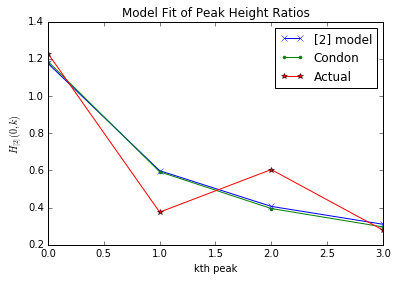

In [9]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=[2], plot_spectra=False, my_methods_list=["voigt"], use_theta=USE_THETA)
plt.savefig("toluene_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.18515166464, c=[-0.22168687 -0.17986233], theta/pi=[ 0.7150627   1.54482794]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 1.0 	 improvement_factor = 1.06745201563



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.829354635361 	 r^2_model = 1.0 	 improvement_factor = 1.20575681061


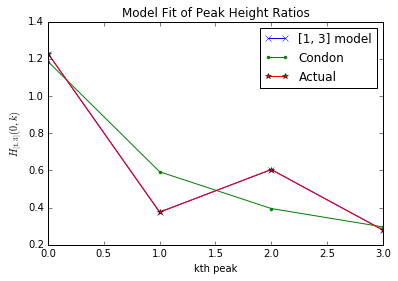

In [10]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[1,3], plot_spectra=False, my_methods_list=["voigt"], use_theta=USE_THETA)
plt.savefig("toluene_ratio_fit_13.png", dpi=900)

PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.1851552135, c=[-1.7786262  -0.94996661], theta/pi=[ 1.40743979  1.24627105]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 1.0 	 improvement_factor = 1.06745201563



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.829354635361 	 r^2_model = 1.0 	 improvement_factor = 1.20575681061


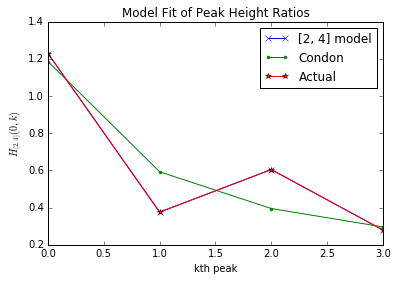

In [11]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[2,4], plot_spectra=False, my_methods_list=["voigt"], use_theta=USE_THETA)
plt.savefig("toluene_ratio_fit_24.png", dpi=900)

# Tetracene in DCE
## Orange in the image below

![See dat spectra...](tetracene_citeable_dichloroethene.png "Tetracene in DCE")

In [12]:
#From DataThief
tetracene_dce_spectra  = np.loadtxt("spectra_csv/tetracene_citeable_dichloroethene.csv", delimiter=",")

tetracene_dce_wavelength_nm = tetracene_dce_spectra[:,0] 
tetracene_dce_wavenumbers = 1 / (tetracene_dce_wavelength_nm * 1e-7)
tetracene_dce_abs = tetracene_dce_spectra[:,1]
tetracene_dce_abs = tetracene_dce_abs - np.min(tetracene_dce_abs)
tetracene_dce_abs = tetracene_dce_abs/tetracene_dce_wavenumbers**2
tetracene_dce_abs = tetracene_dce_abs / np.max(tetracene_dce_abs)
tetracene_dce_abs = np.flipud(tetracene_dce_abs)
tetracene_dce_wavenumbers= np.flipud(tetracene_dce_wavenumbers)

In [13]:
ZERO_PAD = 100

tetracene_dce_wavenumbers, tetracene_dce_abs = PeakTools.left_zero_pad_spectra(tetracene_dce_wavenumbers, tetracene_dce_abs, ZERO_PAD)

In [14]:
tetracene_dcm_peak_energy_guesses = [21053.0, 22505.0, 24057.0, 25368.0 , 26658.3, 28114.]
tetracene_dcm_peak_height_guesses = [.97, .82, .37, .15, .05, .01]
#maybe rpeplace with the toluene numbers.  they worked well enough
width_guess_wavenumbers = 100.0


In [15]:
tetracene_dce_fit = PeakTools.SpectraFit(spectral_energies=tetracene_dce_wavenumbers, 
                           spectral_amplitudes=tetracene_dce_abs, 
                           approx_peak_energies = tetracene_dcm_peak_energy_guesses, 
                           approx_peak_heights = tetracene_dcm_peak_height_guesses, 
                           width_guess = width_guess_wavenumbers)

PREPARING ANALYSIS FOR SPECTRA:


---------GAUSSIAN---------

gaussian profile fit to spectra with cost 1.36519348402
('anharmonic fit', array([ -3.49366960e+00,   1.39781195e+03,   2.04450937e+04]))
('chi', 0.0024993845616929971)
max bound n=199
r^2=0.999500307945

---------LORENTZIAN---------

lorentzian profile fit to spectra with cost 1.84596904708
('anharmonic fit', array([ -9.51655986e+00,   1.45284222e+03,   2.03861791e+04]))
('chi', 0.0065503051506894654)
max bound n=75
r^2=0.999988040093

---------VOIGT---------

voigt profile fit to spectra with cost 0.823995752559
('anharmonic fit', array([   -27.66316828,   1529.72342425,  20332.98317981]))
('chi', 0.018083771116510102)
max bound n=26
r^2=0.999459755093


BEST METHOD WAS: voigt


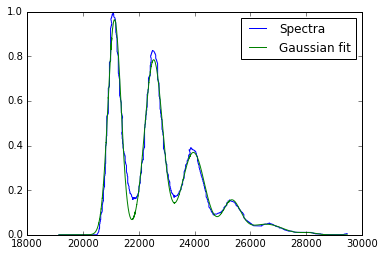

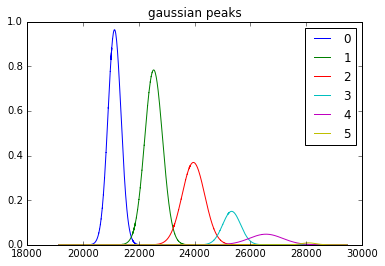

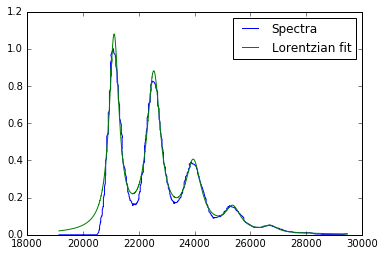

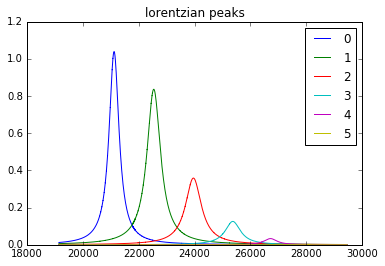

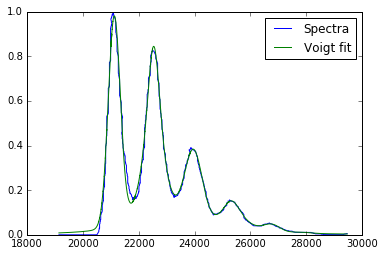

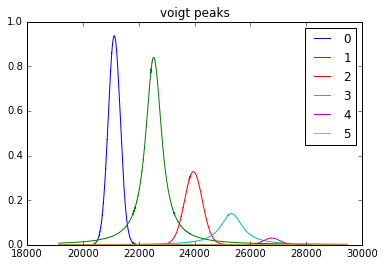

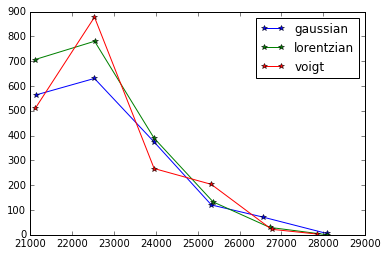

In [16]:
tetracene_dce_fit.fit_and_observe_spectra()

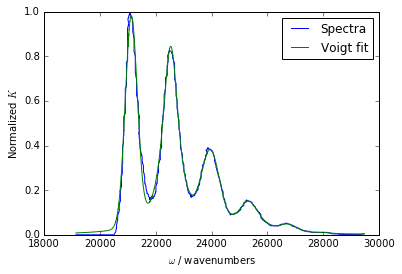

In [17]:
tetracene_dce_fit.plot_spectral_fit(["voigt"])
# plt.title("Tetracene in DCM")
plt.xlabel(r"$\omega$ / wavenumbers")
plt.ylabel(r"Normalized $K$")
plt.legend(loc=0)
plt.savefig("dcm_spectra_fit.png", dpi=900)

In [18]:
tetracene_dce_fit.explore_non_condon_orders(max_order = None, order_lists_to_calculate=o_list, method_str="voigt", use_theta=USE_THETA)

[1] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 3 better models were found
HO/c model fit Found for voigt!  S=0.894268288533, c=[-0.25359709], theta/pi=[ 1.99999923]
Naively S=1.48970543532 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.788400936436 	 r^2_model = 0.792191595742 	 improvement_factor = 1.00480803501



BEST METHOD WAS: voigt
[2] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 4 better models were found
HO/c model fit Found for voigt!  S=1.26266367199, c=[-0.06693437], theta/pi=[ 1.99997573]
Naively S=1.48970543532 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.788400936436 	 r^2_model = 0.838763768859 	 improvement_factor = 1.06387972172



BEST METHOD WAS: voigt
[3] order non-condon perturbation calculation

---------VOIGT---------

Through running 5 lstsq attempts, 2 better models were found
HO/c mod

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20148747417, c=[ 0.00562054], theta/pi=[ 0.]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 0.935206266388 	 improvement_factor = 0.998287814087



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.829354635361 	 r^2_model = 0.83012300166 	 improvement_factor = 1.0009264629


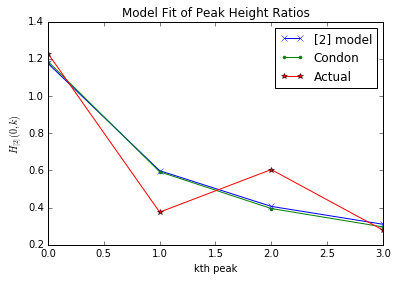

In [19]:
tetracene_toluene_fit.fit_and_observe_non_condon_models([2], plot_spectra=False, my_methods_list=["voigt"], use_theta=USE_THETA)
plt.savefig("toluene_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.26266367199, c=[-0.06693437], theta/pi=[ 1.99997573]
Naively S=1.48970543532 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.788400936436 	 r^2_model = 0.838763768859 	 improvement_factor = 1.06387972172



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.773843542876 	 r^2_model = 0.832685679391 	 improvement_factor = 1.07603880275


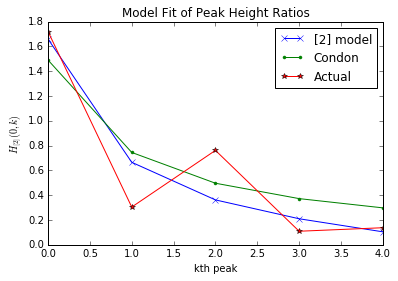

In [20]:
tetracene_dce_fit.fit_and_observe_non_condon_models([2], plot_spectra=False, my_methods_list=["voigt"], use_theta=USE_THETA)
plt.savefig("dcm_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.29016211793, c=[-0.7632715 -0.3104009], theta/pi=[ 0.45106897  0.49222146]
Naively S=1.48970543532 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.788400936436 	 r^2_model = 0.977507212451 	 improvement_factor = 1.23986054211



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.773843542876 	 r^2_model = 0.993693888447 	 improvement_factor = 1.28410180274
PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.1851552135, c=[-1.7786262  -0.94996661], theta/pi=[ 1.40743979  1.24627105]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 1.0 	 improvement_factor = 1.06745201563



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.829354635361 

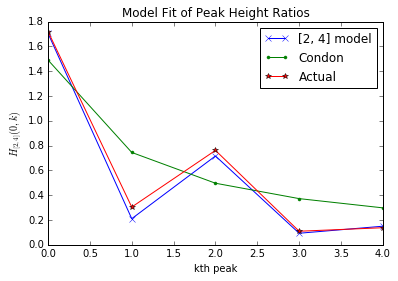

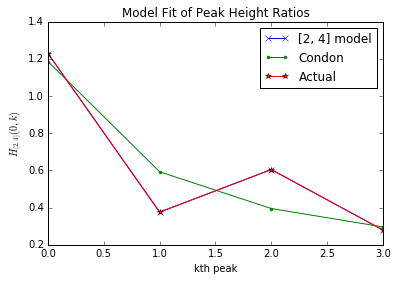

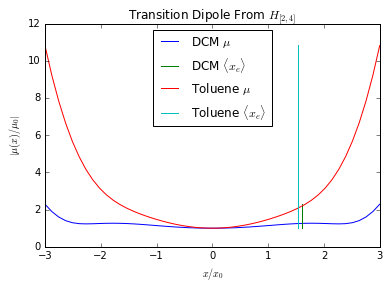

In [21]:
order = [2,4]
tfs=True
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method], use_theta=USE_THETA)
plt.savefig("dcm_ratio_fit_24.png")
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method], use_theta=USE_THETA)
plt.savefig("toluene_ratio_fit_24.png", dpi=900)

x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, re_im_split=tfs, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, re_im_split=tfs, label_prefix="Toluene")
plt.legend(loc=0)
plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_24.png", dpi=900)


PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.17356067863, c=[-0.27718614 -0.23681388], theta/pi=[ 1.33864945  0.39807895]
Naively S=1.48970543532 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.788400936436 	 r^2_model = 0.99673956733 	 improvement_factor = 1.26425467204



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.773843542876 	 r^2_model = 0.976540990338 	 improvement_factor = 1.26193595505
PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.18515166464, c=[-0.22168687 -0.17986233], theta/pi=[ 0.7150627   1.54482794]
Naively S=1.18515166464 without a non-condon correction
peak height goddness of fit: 
r^2_condon = 0.936810259717 	 r^2_model = 1.0 	 improvement_factor = 1.06745201563



BEST METHOD WAS: voigt
peak ratio goodness of fit:
r^2_condon = 0.82935463536

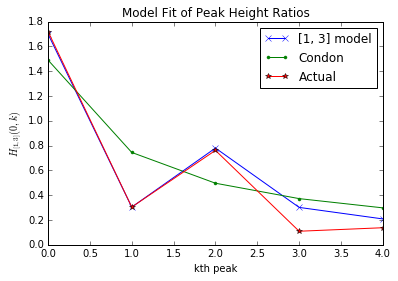

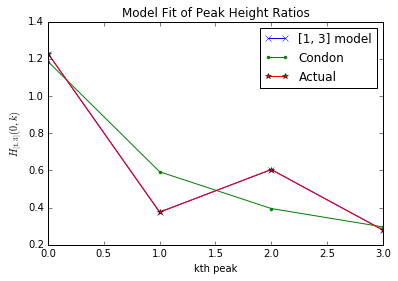

In [22]:
order = [1,3]
method = "voigt"
tfs=True
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method], use_theta=USE_THETA)
plt.savefig("dcm_ratio_fit_13.png")
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method], use_theta=USE_THETA)
plt.savefig("toluene_ratio_fit_13.png", dpi=900)



('test loc 2', [1, 3])
[c1,c3] = [(0.19542438962025266+0.42586147653818229j), (-0.030429778392876417-0.09176508344479499j)]
(0.19542438962+0.425861476538j) * x^1
(-0.0304297783929-0.0917650834448j) * x^3
('test loc 2', [1, 3])
[c1,c3] = [(0.15925590000718695-0.31838691285953513j), (-0.010306868464844415+0.072701524693407849j)]
(0.159255900007-0.31838691286j) * x^1
(-0.0103068684648+0.0727015246934j) * x^3


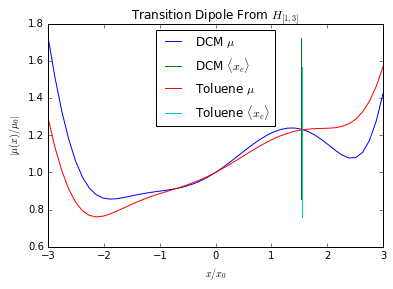

In [23]:
x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, re_im_split=tfs, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, re_im_split=tfs, label_prefix="Toluene")
plt.legend(loc=0)
plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_13.png", dpi=900)

In [25]:
PeakTools.table_generator([1,3], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (1, 3) }$ & 1.174  &  1.185 \\
$c'_{ 1 }$ & -0.277  &  -0.222 \\
$\theta'_{ 1 } / \pi $& 4.205  &  2.246 \\
$c'_{ 3 }$ & -0.237  &  -0.180 \\
$\theta'_{ 3 } / \pi $& 1.251  &  4.853 \\
$r^2_{ (1, 3) }$ & 0.977  &  1.000 \\
